In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

from data.data_reading import data_reading
from data.data_processing import data_processing

from ruspy.simulation.simulation import simulate
from ruspy.simulation.value_zero import calc_ev_0, discount_utility
from ruspy.estimation.estimation import estimate
from ruspy.estimation.estimation_cost_parameters import (
    lin_cost,
    cost_func,
    create_transition_matrix,
    calc_fixp
)
from scripts.worst_case_probs import calc_fixp_worst

In [6]:
# Beta is set almost to one, as the agents objective is to maximize average cost.
beta = 0.9999
# 200 buses should be enough to gurantee convergence.
num_buses = 200
# Set the number of simulated periods to 80000. The first plot shows the convergence at this point.
num_periods = 80000

# Paramters for plotting
gridsize = 1000
num_points = int(num_periods/gridsize)

#Initilize a dictionary with values needed on the way.
init_dict = {
    'estimation':{
        'groups': 'group_4',
        'beta': beta,
        'maint_func': 'linear',
        'binsize': 5000,
        'states': 90,
    },
    'simulation':{
        'beta': beta,
        'periods': num_periods,
        'seed': 123,
        'maint_func': 'linear',
        'buses': num_buses
    }
    
}


In [7]:
data_reading()
repl_data = data_processing(init_dict['estimation'])

In [8]:
trans_results, cost_results = estimate(init_dict['estimation'], repl_data, repl_4=True)
trans_results, cost_results

({'state_count': array([[68, 94,  9, ...,  0,  0,  0],
         [ 0, 44, 59, ...,  0,  0,  0],
         [ 0,  0, 47, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  1,  1,  0],
         [ 0,  0,  0, ...,  0,  1,  1],
         [ 0,  0,  0, ...,  0,  0,  1]]),
  'x': array([0.39189189, 0.59529357, 0.01281454]),
  'fun': 3140.5705570938244,
  'trans_count': array([1682, 2555,   55])},
       fun: 163.58583995489963
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([-7.10542736e-05,  4.14956958e-04])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 45
       nit: 12
    status: 0
   success: True
         x: array([10.07807158,  2.29429882]))

In [9]:
num_states = 20
beta = 0.9999
init_dict['simulation']["params"] = params = np.array(cost_results['x'])
costs = cost_func(num_states, lin_cost, params)
p_ml = np.array(trans_results['x'])
omega = 0.95
rho = chi2.ppf(omega, len(p_ml) - 1) / (2 * 4292)
# rho = 0
threshold = 1e-8

In [27]:
trans_mat_ml = create_transition_matrix(num_states, p_ml)
ev_ml = calc_fixp(num_states, trans_mat_ml, costs, beta, threshold=threshold)

In [ ]:
worst_ev, worst_trans_mat, success, converge_crit = calc_fixp_worst(num_states, p_ml, costs, beta, rho, threshold=threshold)

[]

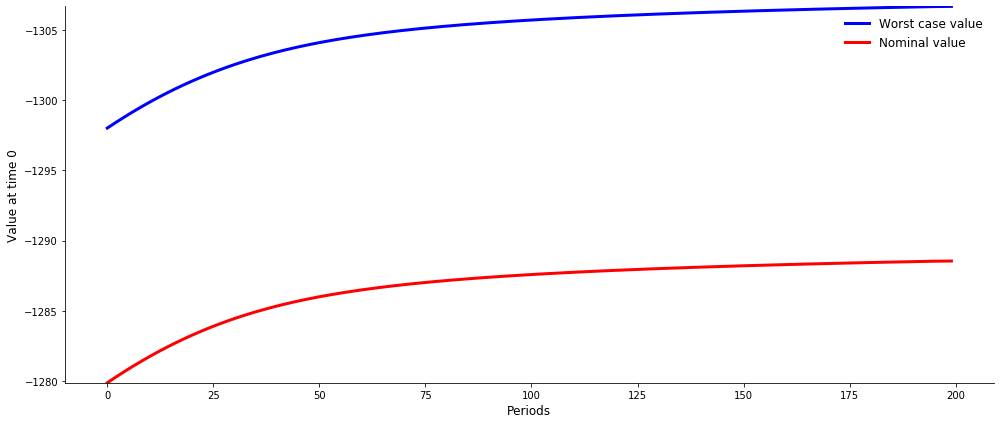

In [33]:
states = range(num_states)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax.set_ylim([ev_ml[0], worst_ev[-1]])
ax.set_ylabel(r"Value at time 0",fontsize=12)
ax.set_xlabel(r"Periods", fontsize=12)
ax.plot(states, worst_ev, color='blue', label='Worst case value')
ax.plot(states, ev_ml, color='red', label='Nominal value')



plt.legend()
ax.legend(fontsize=12)
plt.tight_layout()

plt.plot()